# DEALING WITH ATTRITION IN BUSINESS USING MACHINE LEARNING

## Business Understanding

#### Introduction

Every business or organization struggles with the likelihood to loose customers. Customer churn due to many factors.To help organizations reduce attrition, machine learning can be used to predict the likelihood for a customer to churn or not. This data can help the organisation to implement data- driven strategies to reduce attrition.

#### Aim
Build a classification model that predicts if a client will churn or not.

### Hypothesis and Questions

##### Hypothesis
Null: 25% of customers are likely to Churn.
Alternative: 75% of customers does not churn

1. What is the churn to not churn ratio?

2. Which gender group is likely to churn?

3. How many customers have our phoneService?

4. How many customer have online security?

5. How many customers have tech Support?

#### Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport

# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve
import imblearn
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Other packages
import os

C:\Users\PK\AppData\Local\Temp\ipykernel_7880\1558687526.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Data Understanding

In [2]:
#Loading data
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analaysis

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


No     5174
Yes    1869
Name: Churn, dtype: int64
The churn to not churn ratio is:
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


Text(0.5, 1.0, 'Count of Target Variable')

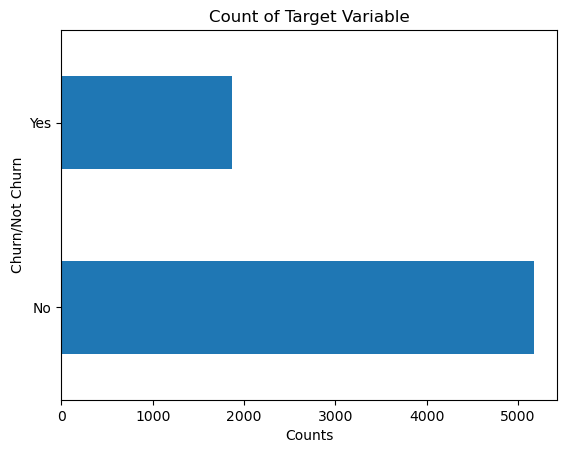

In [6]:
# What is the churn to not churn ratio
ChurnSplit = df['Churn'].value_counts()
print(ChurnSplit)
Ratio = 100*ChurnSplit/len(df['Churn'])
print("The churn to not churn ratio is:\n",Ratio)
ChurnSplit.plot(kind="barh")
plt.xlabel("Counts")
plt.ylabel("Churn/Not Churn")
plt.title("Count of Target Variable")

The above data reject the hypothesis that 25% of customers are likely to churn, even though customers likely to churn is 26.5% which is closer to our null hypothesis

In [7]:
#Generating profile Report for more insights
ProfileReport(df, title ="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observation
1. The data is a binary classification problem

2. The data type of the total charges column need to be changed

3. Colums like multipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StremingTv and StreamingMovies can be regrouped into Yes/No

4. Tenure and Contract type highly influence the probability of a customer to churn or not

#### Data Cleaning

In [8]:
data = df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
def summary(df):
    
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])

    return summary

summary = summary(df)
print(summary)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
summary.loc["TotalCharges","dtype"] = "float64"


                    dtype
customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
OnlineBackup       object
DeviceProtection   object
TechSupport        object
StreamingTV        object
StreamingMovies    object
Contract           object
PaperlessBilling   object
PaymentMethod      object
MonthlyCharges    float64
TotalCharges       object
Churn              object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#Checking for the 11 na values in TotalCharges
data[data.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
#Since the rows with Nan values is just 11, we will drop them
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Univariate Analysis

In [14]:
def Distributionplot(category):
    categoric = df.loc[:, category]
    for i in categoric:
            plt.figure()
            plt.figure(figsize=(10,8))
            sns.countplot(x = i, data = categoric)
            plt.title(f"Distribution of {i}")

Yes    6352
No      680
Name: PhoneService, dtype: int64


<Figure size 640x480 with 0 Axes>

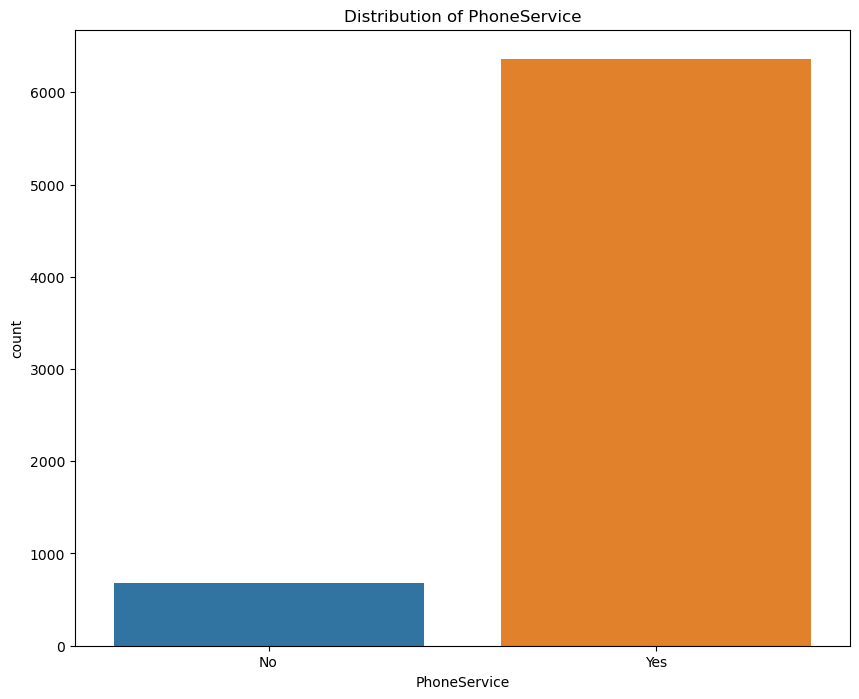

In [15]:
# How many customers have our phoneService
split = data['PhoneService'].value_counts()
print(split)
dist =  ['PhoneService']
Distributionplot(dist)

6,352 customers have phone services

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


<Figure size 640x480 with 0 Axes>

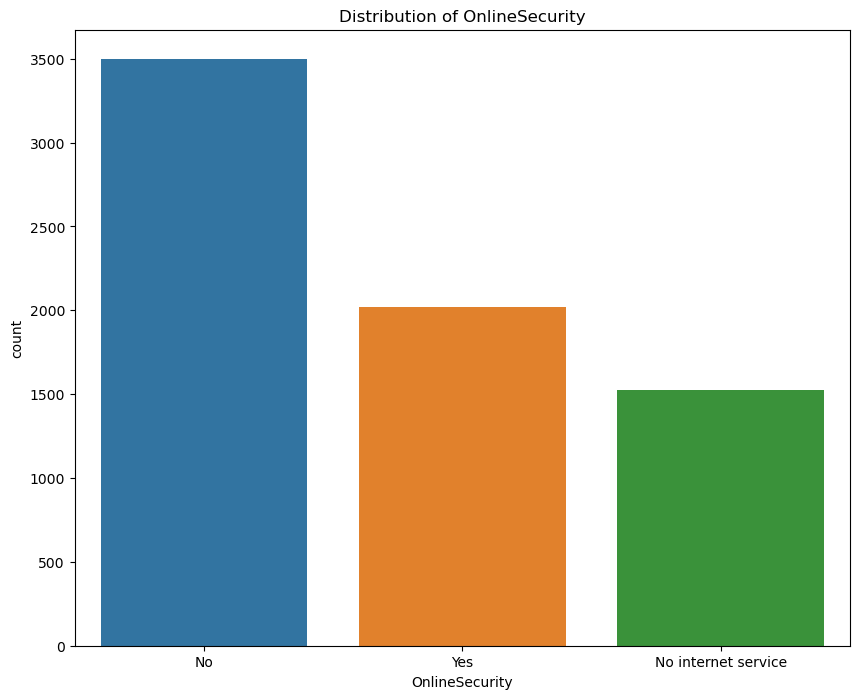

In [16]:
# How many customer have online security?
split = data['OnlineSecurity'].value_counts()
print(split)
dist =  ['OnlineSecurity']
Distributionplot(dist)

2,015 customers have online security

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


<Figure size 640x480 with 0 Axes>

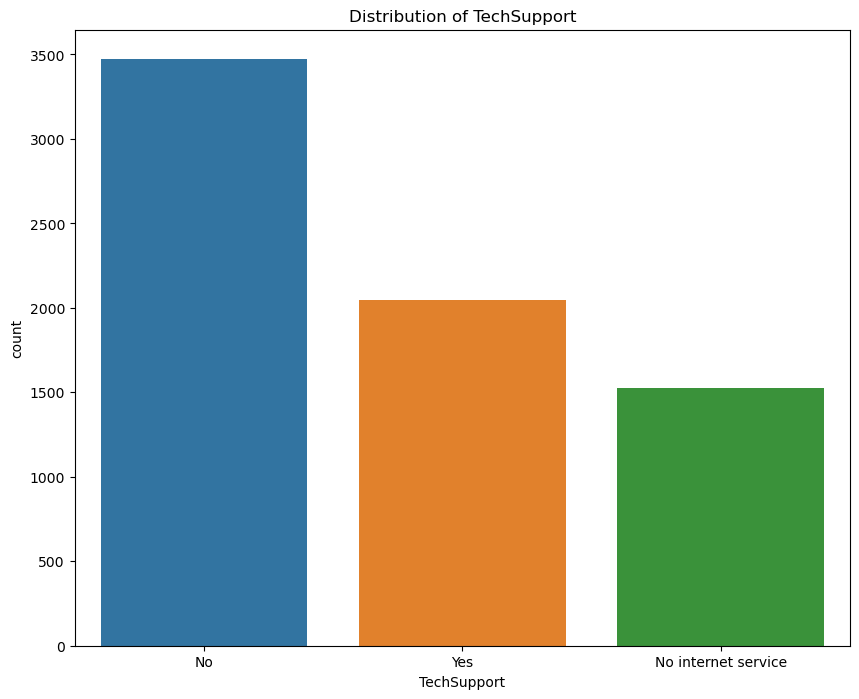

In [17]:
# How many customer have tech support?
split = data['TechSupport'].value_counts()
print(split)
dist =  ['TechSupport']
Distributionplot(dist)

2,040 customers have tech support

#### Bivariate Analysis

In [18]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Figure size 640x480 with 0 Axes>

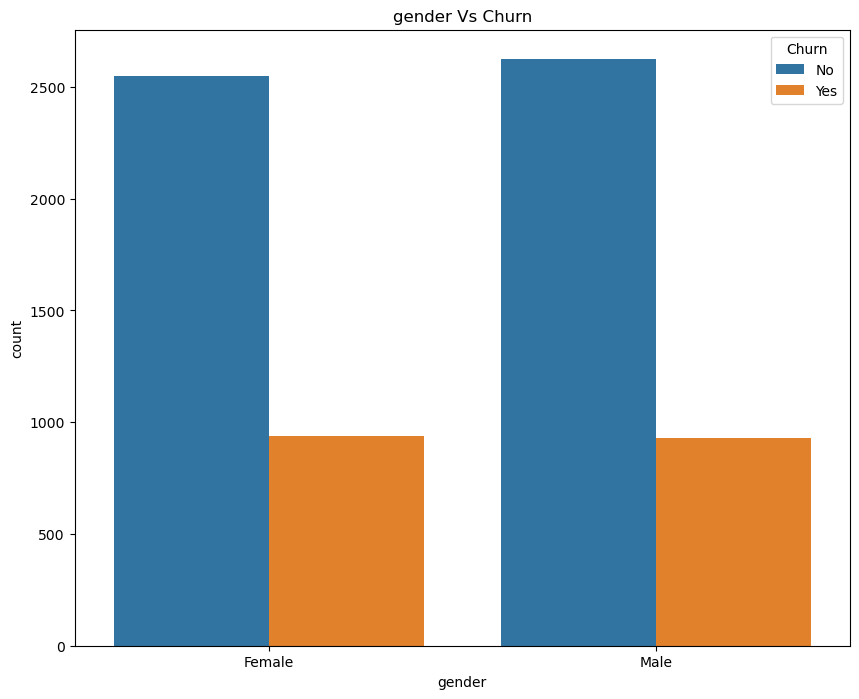

<Figure size 640x480 with 0 Axes>

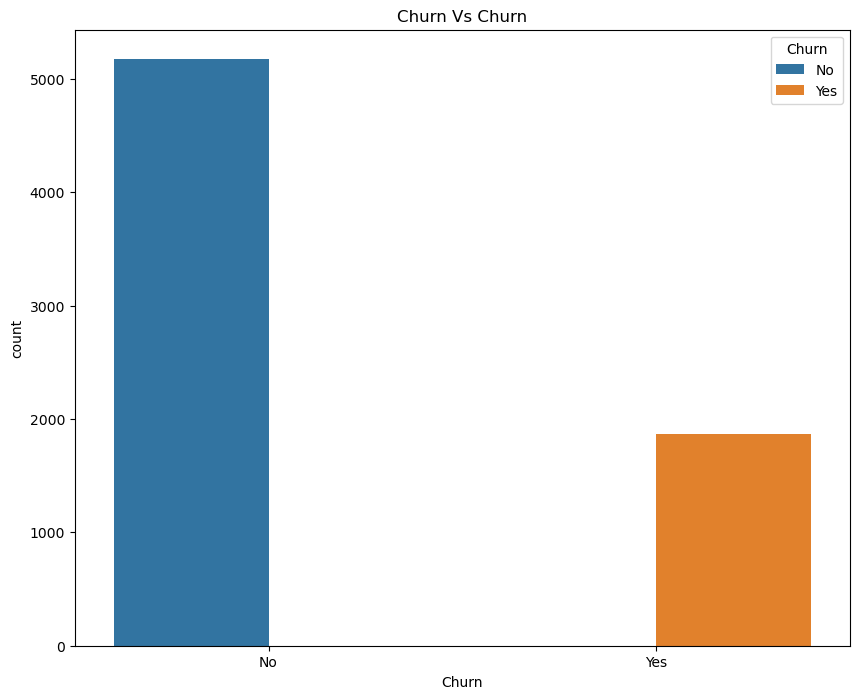

In [19]:
# Which gender group is likely to churn?
def Dist(category):
    DataCat = df.loc[:, category]
    for i in category:
        plt.figure()
        plt.figure(figsize=(10,8))
        sns.countplot(x = i, data = DataCat, hue = "Churn")
        plt.title(f'{i} Vs Churn')
        
dataGroup = ['gender', "Churn"]

Dist(dataGroup)

## Data Preprocessing

In [20]:
label = [f"{i} - {i+11}" for i in range(1,72,12)]
data['tenure_Cat'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=label)

data['tenure_Cat'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_Cat, dtype: int64

In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_Cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [22]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [23]:
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})

In [24]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_Cat
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,No,No,No,One year,0,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,1 - 12


In [25]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   int64   
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   int64   
 4   Dependents        7032 non-null   int64   
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   int64   
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

In [27]:
# Using the get_dummies function to encode the remaining categorical data

df = pd.get_dummies(data)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_Cat_1 - 12,tenure_Cat_13 - 24,tenure_Cat_25 - 36,tenure_Cat_37 - 48,tenure_Cat_49 - 60,tenure_Cat_61 - 72
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,0,1,0,1,0,0,0,0
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,0,0,0,0,0,0,1
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,1,0,1,0,0,0,0,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,1,1,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Columns: 7079 entries, gender to tenure_Cat_61 - 72
dtypes: float64(2), int64(8), uint8(7069)
memory usage: 48.0 MB


In [29]:
#Dropping columns
df.drop(columns=["tenure"],inplace=True)

In [30]:
#Data Scaling
df["MonthlyCharges"] = MinMaxScaler().fit_transform(df[["MonthlyCharges"]])

## Building Model and Evaluation

In [31]:
# Split the data into features (X) and target (y)
X = df.drop(['Churn'], axis=1)
y = df["Churn"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### XGBoost model

In [32]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)
y_pred = XGBmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 79.39%
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1043
           1       0.62      0.53      0.57       364

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



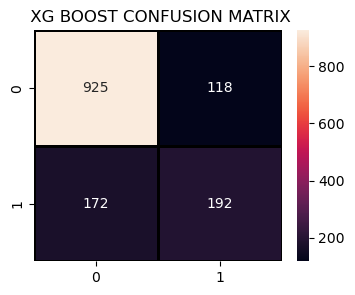

In [33]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" XG BOOST CONFUSION MATRIX")
plt.show()

#### RandomForest model

In [34]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 80.38%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1043
           1       0.66      0.49      0.56       364

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



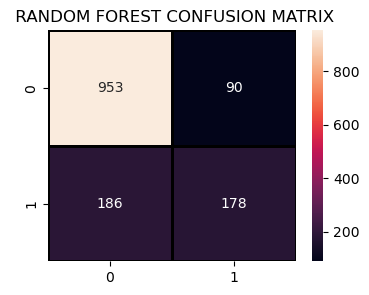

In [35]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX")
plt.show()

In [36]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=1)   

X_train_new, y_train_new = smote.fit_resample(X_train, y_train.ravel())



In [37]:
#build model on  sampled data
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_new, y_train_new)
y_pred = rfmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 78.46%
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1043
           1       0.58      0.63      0.60       364

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.79      0.78      0.79      1407



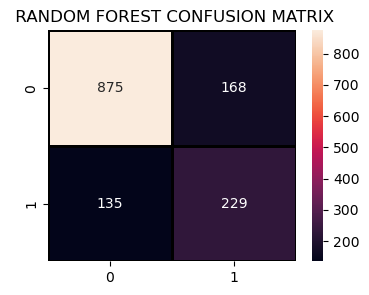

In [38]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX")
plt.show()

In [39]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train_new, y_train_new)
y_pred = XGBmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 79.82%
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1043
           1       0.62      0.56      0.59       364

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



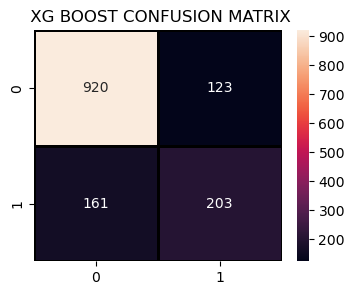

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" XG BOOST CONFUSION MATRIX")
plt.show()

## Ada Boost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ADmodel = AdaBoostClassifier()
ADmodel.fit(X_train_new, y_train_new)
y_pred = ADmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 75.98%
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1043
           1       0.53      0.66      0.59       364

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



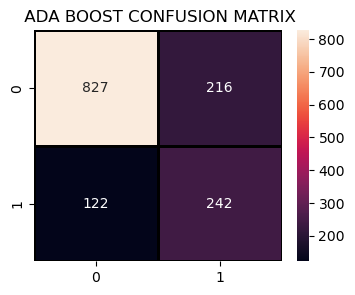

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" ADA BOOST CONFUSION MATRIX")
plt.show()

###### Observations and Conclusion

After trying all the three models, the following observations were made;

1. The first two RandomForest and XGBoost model is more accurate in predicting if a customer will not
   churn than to predict if will churn.

2. After sampling, the F1 score for churn prediction increased.

3. The Adaboostmodel is the best model out the three in terms of precision, recall and accuracy.

###### Conclusion

 As an organization we are more interested to predict accurately as much customers likely to churn, to help deal with
attrition. Hence the Adaboost model is the best based in comparing the confusion matrix.

## Model Interpretation

 #### features that influence model prediction the most

### Feature Selection

In [43]:
#Finding the most important features of the model
Selection = AdaBoostClassifier()      
Selection  = Selection.fit(X_train_new, y_train_new)
importance = Selection.feature_importances_

Impfeatures = zip(X_train.columns, importance)
feature_importance = pd.DataFrame(Impfeatures , columns =['Features', 'Importances'])
feature_importance.sort_values(by="Importances",inplace=True,ascending=False)

In [44]:
feature_importance.head(10)

,Features,Importances
6,MonthlyCharges,0.10
7,TotalCharges,0.08
7064,Contract_Month-to-month,0.08
7040,MultipleLines_No,0.06
7052,DeviceProtection_No,0.04
7070,PaymentMethod_Mailed check,0.04
7049,OnlineBackup_No,0.04
7054,DeviceProtection_Yes,0.04
7062,StreamingMovies_No internet service,0.04
7068,PaymentMethod_Credit card (automatic),0.04


In [45]:
#Using most important features for the model
top10Features = feature_importance.head(10).Features

X_top10 = df[top10Features]
y = df["Churn"]


X_train_top10, X_test_top10, y_train, y_test = train_test_split(X_top10, y, test_size = 0.2, random_state=42, stratify=df["Churn"])


In [46]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=1)   

X_train_top10new, y_train_top10new = smote.fit_resample(X_train_top10, y_train.ravel())

In [52]:
ADtop10model = AdaBoostClassifier(n_estimators=100)
ADtop10model.fit(X_train_top10new, y_train_top10new)
y_pred = ADtop10model.predict(X_test_top10)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred, labels=[0,1]))

Accuracy: 76.47%
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.55      0.68      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



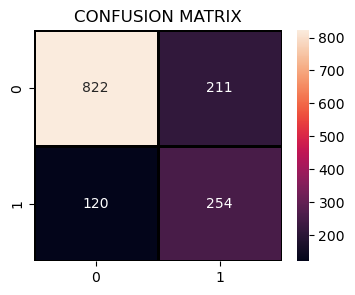

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title("CONFUSION MATRIX")
plt.show()

### Hyperparameter Tuning

In [54]:
param_grid = {"n_estimators": [200,225,250,300,325,350],
              "max_depth": [1,2],
              "min_samples_leaf": [5,10,15],
              "bootstrap": [True, False]}


grid_search_forest = GridSearchCV(rfmodel, 
                                  param_grid, 
                                  cv = 3, 
                                  scoring = "recall",
                                  n_jobs=-1,
                                  verbose=3)

grid_search_forest.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [200, 225, 250, 300, 325, 350]},
             scoring='recall', verbose=3)

In [55]:
Finalmodel = grid_search_forest.best_estimator_
y_pred = Finalmodel.predict(X_test)

print(classification_report(y_test, y_pred))
print("\nScore of test data:")
print(f" Mean Accuracy   :{rfmodel.score(X_test, y_test):.4}")
print(f" F1 score        :{f1_score(y_test, y_pred):.4}")
print(f" Precision score :{precision_score(y_test, y_pred):.4}") 
print(f"*Recall score*   :{recall_score(y_test, y_pred):.4}")


              precision    recall  f1-score   support

           0       0.73      0.51      0.60      1033
           1       0.26      0.48      0.34       374

    accuracy                           0.50      1407
   macro avg       0.50      0.49      0.47      1407
weighted avg       0.61      0.50      0.53      1407


Score of test data:
 Mean Accuracy   :0.5842
 F1 score        :0.3378
 Precision score :0.2618
*Recall score*   :0.4759


##### Diifferent parameter grid values will be tried till a good recall model is obtained

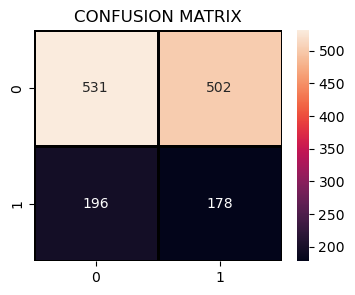

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title("CONFUSION MATRIX")
plt.show()

In [58]:
#Save the best model
Finalmodel = ADtop10model.fit(X_train_top10new, y_train_top10new)
import pickle
pickle.dump(Finalmodel, open('telecom_churn_best_model.sav', 'wb'))
AD = pickle.load(open('telecom_churn_best_model.sav', 'rb'))